In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Interfaz orientada a objetos

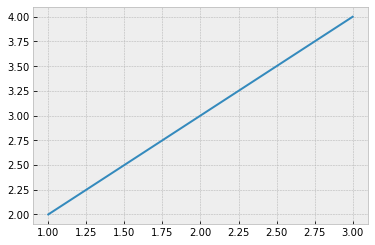

In [5]:
mpl.style.use('bmh')
fig, ax = plt.subplots()
ax.plot([1, 3], [2, 4])

### Interfaz orientada a estados

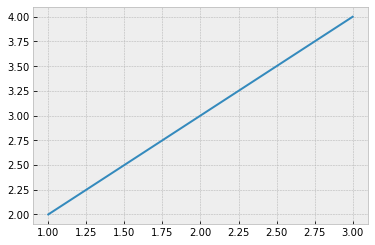

In [4]:
plt.plot([1, 3], [2, 4])

In [8]:
df_lluvias.index = df_lluvias['Year']
df_lluvias = df_lluvias.drop('Year',axis='columns')
df_lluvias.head(3)

Jan    Feb   Mar     Apr     May      Jun      Jul      Aug      Sep  \
Year                                                                           
1965  0.029  0.069  0.00  21.667  17.859  102.111  606.071  402.521   69.511   
1966  0.905  0.000  0.00   2.981  63.008   94.088  481.942   59.386  150.624   
1967  0.248  3.390  1.32  13.482  11.116  251.314  780.006  181.069  183.757   

         Oct     Nov     Dec  
Year                          
1965   5.249  16.232  22.075  
1966   1.308  41.214   4.132  
1967  50.404   8.393  37.685

### Grafiquemos las precipitaciones acumuladas para los distintos a√±os

In [12]:
#Para el EJE X seleccionamos los a√±os, es decir, el √≠ndice
x = df_lluvias.index

#Para el EJE Y acumulamos las precipitaciones por a√±o, suma los valores de todas las columnas
y = df_lluvias.sum(axis='columns')
y

Year
1965    1263.394
1966     899.588
1967    1522.184
1968    1086.237
1969    1739.022
1970    1273.507
1971    1176.612
1972     710.475
1973    1570.073
1974    1425.876
1975    1777.838
1976    1941.167
1977    1202.154
1978    1168.583
1979    1769.187
1980    1268.185
1981    1562.761
1982     943.087
1983    1616.948
1984    1538.961
1985    1214.852
1986    1267.969
1987    1197.999
1988    1822.649
1989    1400.024
1990    1766.294
1991    1497.256
1992    1323.883
1993    1210.252
1994    1987.689
1995    1209.068
1996    1631.331
1997    1844.840
1998    1603.243
1999    1235.683
2000    1094.062
2001    1045.825
2002    1024.881
dtype: float64

### Serie de tiempo

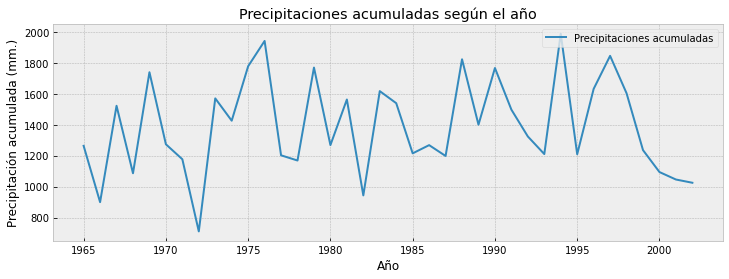

In [14]:
#Definimos los objetos fig y ax, los cuales contendr√°n la figura
#El m√©todo ax.plot recibe el par√°metro figsize, que define el tama√±o del gr√°fico. Para una figura rectangular de 12x4
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='Precipitaciones acumuladas')

#Etiquetamos los ejes, a√±adimos un t√≠tulo e insertamos la leyenda
ax.set_xlabel('A√±o')
ax.set_ylabel('Precipitaci√≥n acumulada (mm.)')
ax.set_title('Precipitaciones acumuladas seg√∫n el a√±o')

#El m√©todo ax.legend inserta la leyenda en alguna esquina que no tape el gr√°fico. Esto se puede modificar con el par√°metro loc.
ax.legend()
#Forzar√° a que la leyenda aparezca en la esquina superior derecha
ax.legend(loc='upper right')

(1965.0, 2002.0)

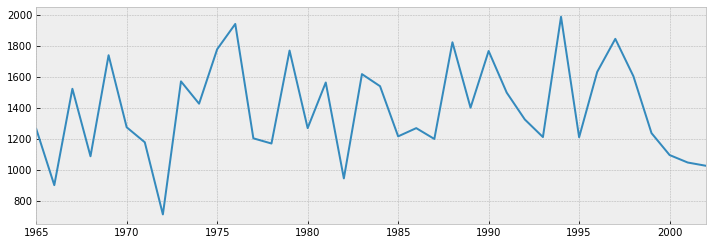

In [19]:
#Si se observa la serie de tiempo anterior, pueden notarse los bordes vac√≠os en los laterales.
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='Precipitaciones acumuladas')

#Pueden recortarse con  ax.set_xlim
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-1])

### Exportando

In [20]:
fig.savefig("precipitaciones_a√±o.pdf")

### Gr√°ficos m√°s comunes

#### De l√≠neas

Son adecuados para visualizar datos con secuencialidad temporal, como las series de tiempo.
Se grafican con el m√©todo  ax.plot(x, y)
En caso de no especificarse x, matplotlib toma como coordenadas en x al arreglo de n√∫meros enteros [0, 1, 2, ‚Ä¶, n]

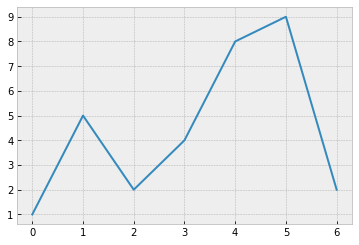

In [21]:
fig, ax = plt.subplots()
ax.plot([0, 1, 2, 3, 4, 5, 6], [1, 5, 2, 4, 8, 9, 2])

Es equivalente a...

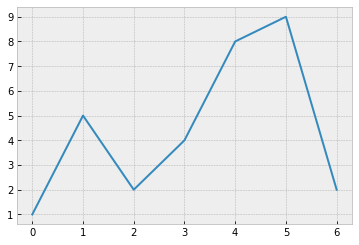

In [22]:
fig, ax = plt.subplots()
ax.plot([1, 5, 2, 4, 8, 9, 2])

#### De puntos

√ötiles cuando se tienen una gran cantidad de datos num√©ricos emparejados
Permiten visualizar la relaci√≥n entre las variables por medio de la nube de puntos
Nube de puntos ‚Äúalineada‚Äù          relaci√≥n fuerte
Nube de puntos ‚Äúdispersa‚Äù          relaci√≥n d√©bil o nula
Se grafican con ax.scatter

Consideremos las mediciones del peso y altura de 50 alumnos

In [23]:
pesos = [42.8, 43.3, 42. , 44. , 44.1, 43.5, 48.1, 48.9, 47.7,46.9,50.4,
       52.7, 51.8, 54.5, 54.2, 56.9, 55.4, 55.5, 57.1, 58.3, 63.7, 58.8,
       64.6, 60.2, 64. , 63.8, 61.4, 66.3, 64.7, 63.9, 69.3, 67.9, 65.2,
       70.8, 70.5, 69.3, 75.3, 75.5, 78.2, 78. , 73.2, 78. , 80.1, 78.2,
       76. , 81.5, 79.4, 81.8, 81.8, 84.1]
alturas = [149. , 149. , 149.9, 156.8, 150.6, 155.4, 151. , 162. , 165.,
       157.8, 164.4, 160.1, 160.8, 163.8, 175.2, 162. , 159.5, 159.2,
       169.8, 166.7, 179.4, 180.6, 163.3, 178.8, 176.3, 184.8, 181. ,
       170.5, 184.1, 187.1, 187.1, 177.7, 184.5, 190.3, 196. , 192.1,
       200.4, 201.8, 187.5, 202.1, 200.3, 208.8, 204.6, 193.5, 200.9,
       196.8, 213.1, 204.8, 215.5, 210.2] 

Text(0, 0.5, 'Peso (kg.)')

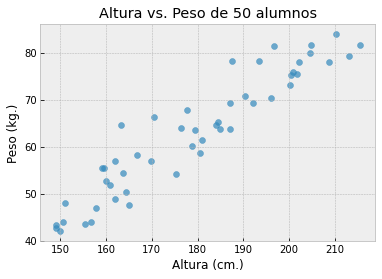

In [24]:
fig, ax = plt.subplots()
ax.scatter(alturas, pesos, alpha=0.7)
ax.set_title('Altura vs. Peso de 50 alumnos')
ax.set_xlabel('Altura (cm.)')
ax.set_ylabel('Peso (kg.)')

Para poder visualizar la relaci√≥n, los valores de los arreglos que se emparejan deben guardar correspondencia entre s√≠. El peso de la primera persona debe estar junto con la altura de la misma persona.
El par√°metro alpha permite cambiar la transparencia de los puntos. Muy √∫til cuando graficamos muchos puntos.
alpha = 1              puntos s√≥lidos
alpha = 0.01         puntos casi transparentes


Probemos con el dataframe de lluvias
¬øGuardar√°n alg√∫n tipo de relaci√≥n las precipitaciones de Agosto respecto de las de septiembre? 

Text(0, 0.5, 'Precipitaciones en Septiembre (mm.)')

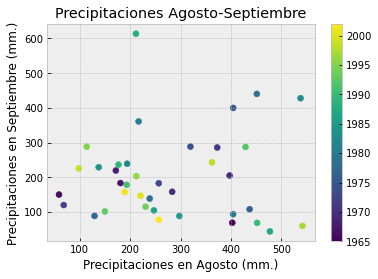

In [25]:
fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)
fig.colorbar(mapeo_colores)
ax.set_title('Precipitaciones Agosto-Septiembre')
ax.set_xlabel('Precipitaciones en Agosto (mm.)')
ax.set_ylabel('Precipitaciones en Septiembre (mm.)')

#### De barras

Permiten comparar y poner en perspectiva los valores de distintas variables categ√≥ricas. Por ejemplo, las precipitaciones seg√∫n el mes del a√±o. 
Para el ejemplo, acumulemos las precipitaciones para los distintos meses a lo largo de los a√±os.


In [26]:
precipitaciones_acumuladas = df_lluvias.sum()
precipitaciones_acumuladas

Jan       11.186
Feb       41.843
Mar       63.733
Apr      470.487
May      952.272
Jun    12809.663
Jul    16340.395
Aug    10529.357
Sep     7642.245
Oct     2783.320
Nov      958.492
Dec      230.646
dtype: float64

Text(0.5, 0, 'Mes')

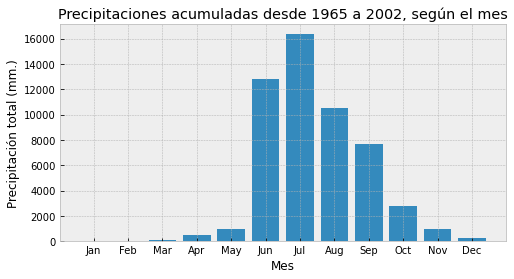

In [27]:
fig, ax = plt.subplots(figsize=(8,4))
precipitaciones_acumuladas = df_lluvias.sum()
ax.bar(df_lluvias.columns, precipitaciones_acumuladas)
ax.set_title('Precipitaciones acumuladas desde 1965 a 2002, seg√∫n el mes')
ax.set_ylabel('Precipitaci√≥n total (mm.)')
ax.set_xlabel('Mes')

- El eje x representa categor√≠as.
- La altura de cada barra en el eje y representa la cantidad de elementos para la categor√≠a correspondiente.
- Se grafican con ax.bar,que recibe como par√°metros:
    - las etiquetas para el eje x
    - la altura de la barra para cada etiqueta

#### Histograma

- La altura de cada barra representa la proporci√≥n o cantidad de los distintos valores de una variable num√©rica.
- Requiere clasificar a los datos en intervalos de clase.
- Permiten comparar la frecuencia relativa o absoluta de cada intervalo.
- Se construyen con ax.hist, que recibe como par√°metro: El arreglo de valores.bins, que representa la cantidad de intervalos a construir.

Aplanemos los valores del Data Frame con el m√©todo flatten

Text(0, 0.5, 'Frecuencia absoluta')

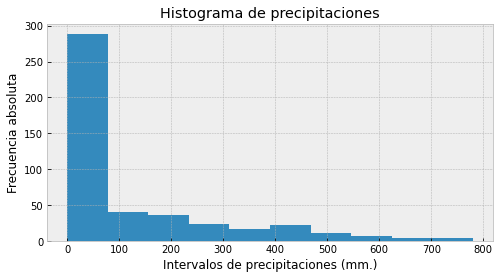

In [31]:
df_lluvias.values.flatten()
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_lluvias.values.flatten(), bins=10)
ax.set_title('Histograma de precipitaciones')
ax.set_xlabel('Intervalos de precipitaciones (mm.)')
ax.set_ylabel('Frecuencia absoluta')

La forma del histograma depende del n√∫mero de intervalos de clase que pasemos al par√°metro bins.
En el ejemplo se represent√≥ la frecuencia absoluta de los intervalos.
Tambi√©n se puede representar la frecuencia relativa de cada intervalo o el porcentaje respecto del total.


### Enriqueciendo las visualizaciones

#### M√∫ltiples elementos

En ocasiones necesitamos resaltar ciertas caracter√≠sticas de los datos. 
- Por ejemplo, ¬øQu√© pasa si quisi√©ramos resaltar el punto m√°ximo en una serie de tiempo?
- Podemos cargar al objeto ax con m√∫ltiples elementos para que los muestre todos juntos?

Comparemos las precipitaciones de Enero y Febrero en el mismo objeto ax

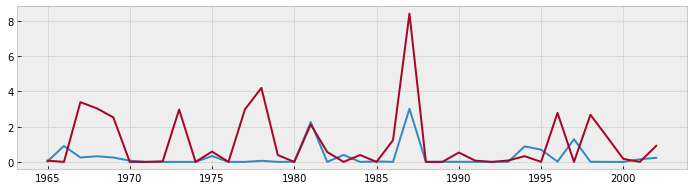

In [44]:
fig, ax = plt.subplots(figsize=(12, 3))  
ax.plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')

Con una agregaci√≥n, calculamos el m√°ximo de cada uno

In [45]:
maximo_enero = df_lluvias['Jan'].max()
maximo_febrero =  df_lluvias['Feb'].max()

El m√©todo axhline permite graficar l√≠neas horizontales. Usemos esto para resaltar los m√°ximos de cada serie de tiempo


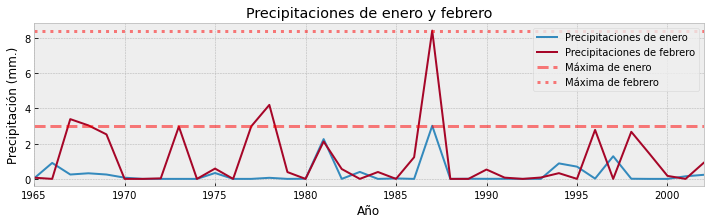

In [53]:
fig, ax = plt.subplots(figsize=(12, 3))  
ax.plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
maximo_enero = df_lluvias['Jan'].max()
maximo_febrero =  df_lluvias['Feb'].max()

ax.axhline(maximo_enero, color='red', linestyle='--', alpha=0.5,    linewidth=3, label='M√°xima de enero')
ax.axhline(maximo_febrero, color='red', linestyle=':', alpha=0.5, linewidth=3, label='M√°xima de febrero')

ax.set_xlabel('A√±o')  
ax.set_ylabel('Precipitaci√≥n (mm.)') 
ax.set_title('Precipitaciones de enero y febrero') 	
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-1])
ax.legend() 

### Subgr√°ficos

Podemos definir una grilla de gr√°ficos dentro de una misma figura.

En plt.subplots, especificamos:
- El n√∫mero de filas de la grilla -> nrows
- El n√∫mero de columnas de la grilla -> ncols
- El objeto ax se convierte en un array. Por lo tanto, debemos usar corchetes ‚ö†Ô∏è

Comparemos las precipitaciones de Enero, Febrero y Marzo a lo largo de los a√±os. ¬øCu√°l ser√° el m√°s seco? ü§î
- Definimos un objeto ax con tres filas y una sola columna
    - En el eje x		los a√±os
    - En el eje y		las precipitaciones

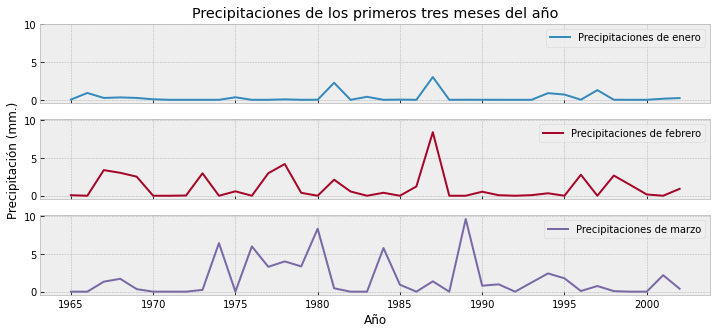

In [56]:
#Como los a√±os son los mismos para todos los gr√°ficos, ponemos el par√°metro sharex en True
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  

#A cada fila, le asignamos las precipitaciones de un mes
ax[0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax[2].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')

#Por √∫ltimo, a√±adimos texto y leyendas
ax[0].set_title('Precipitaciones de los primeros tres meses del a√±o') 
ax[2].set_xlabel('A√±o')  
ax[1].set_ylabel('Precipitaci√≥n (mm.)')

ax[0].legend()  
ax[1].legend()
ax[2].legend()

Al pasar sharey=True, los subgr√°ficos comparten la escala en el eje y. Esto permiti√≥ comparar a simple vista el volumen de precipitaciones.
- Cada subgr√°fico puede tener su propio t√≠tulo y etiquetas.
- En caso de tener dos filas y dos columnas, ax se torna bidimensional:
    - El subgr√°fico superior izquierdo se referencia con ax[0,0]
    - El subgr√°fico superior derecho se referencia con ax[0,1]

### Personalizando matplotlib


Matplotlib permite modificar cada aspecto de sus gr√°ficos por medio de par√°metros.
- Al importar la librer√≠a, Matplotlib establece establece sus par√°metros por defecto.
- Los par√°metros se guardan en una estructura de datos de tipo dict. Se puede obtener una lista de los par√°metros consultando sus claves.

In [57]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': '#bcbcbc',
          'axes.facecolor': '#eeeeee',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
    

Par√°metros m√°s comunes

| Par√°metro          | Descripci√≥n                       | Valor por defecto |
|--------------------|-----------------------------------|-------------------|
| axes.grid          | Mostrar grilla                    | True              |
| axes.titleweight   | Grosor tipograf√≠a t√≠tulo          | "normal"          |
| axes.titlelocation | Posici√≥n del t√≠tulo               | "center"          |
| axes.grid.axis     | Ejes de la grilla                 | "both"            |
| axes.labelcolor    | Color de etiquetas                | "black"           |
| axes.labelsize     | Tama√±o de fuente de las etiquetas | "large"           |
| axes.labelweight   | Grosor de fuente de las etiquetas | "normal"          |
| grid.alpha         | Transparencia de la grilla        | 1.0               |
| grid.color         | Color de la grilla                | "#b2b2b2"         |
| grid.linestyle     | Estilo de grilla                  | "--"              |
| grid.linewidth     | Grosor de la grilla               | 0.5               |
| legend.fontsize    | Tama√±o de fuente de la leyenda    | "medium"          |

In [59]:
mpl.rcParams['axes.titleweight'] = 'bold' 
mpl.rcParams['axes.titlelocation'] = 'left' 
mpl.rcParams['axes.titlecolor'] = 'firebrick' 
mpl.rcParams['axes.labelcolor'] = 'blue' 
mpl.rcParams['axes.labelsize'] = '10' 
mpl.rcParams['axes.labelweight'] = 'light' 
mpl.rcParams['axes.linewidth'] = '1' 
mpl.rcParams['grid.color'] = 'black' 
mpl.rcParams['grid.linestyle'] = '-.' 
mpl.rcParams['grid.linewidth'] = '2'

Text(0, 0.5, '(Etiqueta eje vert.)')

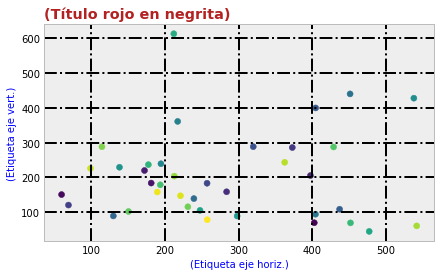

In [60]:
fig, ax = plt.subplots(figsize=(7, 4))  
ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)
ax.set_title('(T√≠tulo rojo en negrita)')
ax.set_xlabel('(Etiqueta eje horiz.)')
ax.set_ylabel('(Etiqueta eje vert.)')

#### Observaciones

Otra forma de modificar los par√°metros es mediante plt.rc

In [ ]:
plt.rc('axes', titlelocation='left', titlecolor='firebrick', ...)
plt.rc('grid', color='black', linestyle='-.', ...)

Es posible restablecer los par√°metros por defecto

In [62]:
mpl.rcParams.update(mpl.rcParamsDefault)

## Seaborn

Funciona por encima de matplotlib. 
- Se integra muy bien con las estructuras de datos de Pandas.
- Provee m√©todos que facilitan la generaci√≥n de gr√°ficos para la comparaci√≥n de variables categ√≥ricas.
- Provee sus propios estilos y colores (muy est√©ticos, por cierto üòè).

Cuestiones a considerar
- Seaborn tiene una sintaxis diferente a matplotlib, por lo que s√≥lo lo aprovecharemos por su punto fuerte: las visualizaciones de variables categ√≥ricas.
- Como Seaborn se construye sobre matplotlib, puede actualizar los par√°metros de matplotlib con los estilos de Seaborn y seguir graficando normalmente

In [64]:
sns.set()

Seaborn trae algunos datasets de prueba, exploremos uno:

Los valores son mediciones del pulso de 30 personas tras realizar alg√∫n tipo de actividad por un determinado tiempo.

- Id: 	n√∫mero identificador de la persona
- Diet: dieta de la persona			baja en grasas o sin grasas
- Time: duraci√≥n del ejercicio		1 min, 15 min o 30 min
- Kind: tipo de ejercicio			reposo, caminar o correr

In [65]:
df_ejercicio = sns.load_dataset('exercise')
df_ejercicio = df_ejercicio.drop('Unnamed: 0', axis='columns')
df_ejercicio.head()

id     diet  pulse    time  kind
0   1  low fat     85   1 min  rest
1   1  low fat     85  15 min  rest
2   1  low fat     88  30 min  rest
3   2  low fat     90   1 min  rest
4   2  low fat     92  15 min  rest

Extraigamos s√≥lo aquellas observaciones que se corresponden con un ejercicio de 30 minutos

In [67]:
df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']
df_30_min.head()

id     diet  pulse    time  kind
2    1  low fat     88  30 min  rest
5    2  low fat     93  30 min  rest
8    3  low fat     94  30 min  rest
11   4  low fat     83  30 min  rest
14   5  low fat     91  30 min  rest

Graficamos las distribuciones con sns.displot
- Debemos especificar la columna de valores en el par√°metro x, en este caso nos interesa la columna pulse
- Como queremos separar las distribuciones seg√∫n el tipo de actividad, pasamos el par√°metro hue='kind'
- Con el par√°metro kind='kde', Seaborn realiza una estimaci√≥n de la distribuci√≥n a partir de los datos del Data Frame. A grandes rasgos, se puede pensar a este tipo de gr√°ficos como una versi√≥n suavizada del histograma de frecuencias relativas.
- Con el par√°metro kind='hist', Seaborn graficar√° un histograma.
- El par√°metro fill a√±ade el sombreado debajo de la distribuci√≥n

<Figure size 640x480 with 0 Axes>

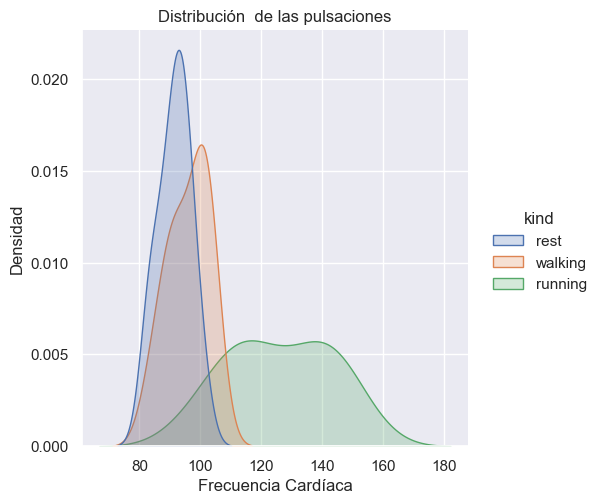

In [68]:
plt.figure()
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Card√≠aca', ylabel='Densidad', title='Distribuci√≥n  de las pulsaciones')

### Categorical plots

Si bien los ejemplos anteriores nos permit√≠an visualizar las distribuciones de acuerdo a una categor√≠a, podr√≠amos querer visualizar los datos en base a dos variables distintas ü§î

sns.catplot con el par√°metro kind='violin' permite comparar distribuciones separando los datos en base a dos categor√≠as simult√°neamente.

#### Desagregaci√≥n en base a duraci√≥n y dieta

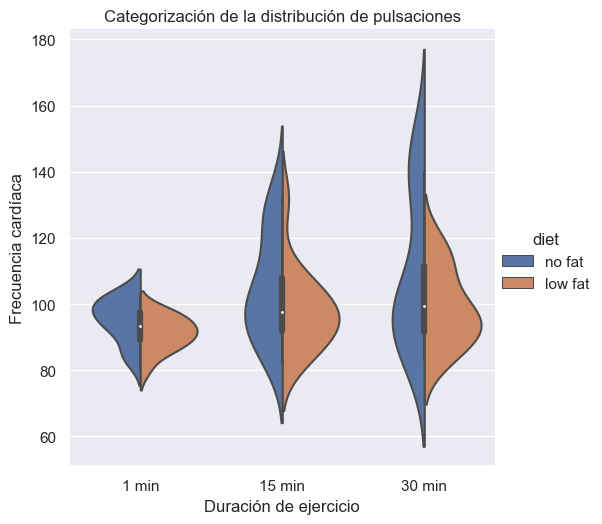

In [70]:
ax = sns.catplot(data=df_ejercicio, kind='violin', x='time', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duraci√≥n de ejercicio', ylabel='Frecuencia card√≠aca', title='Categorizaci√≥n de la distribuci√≥n de pulsaciones')

Para visualizar en base a la actividad, √∫nicamente cambiamos el valor del par√°metro x

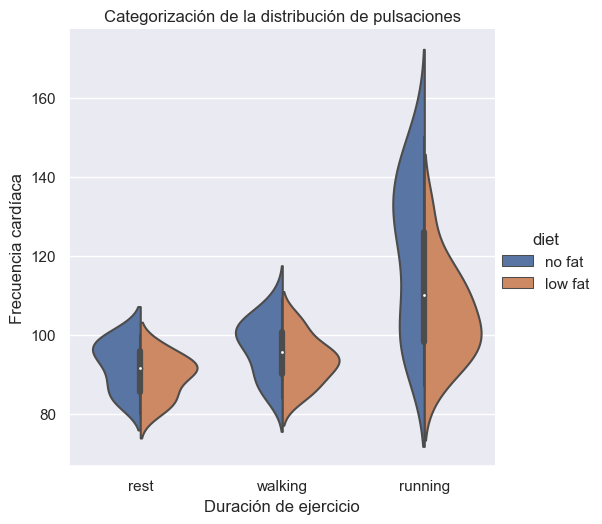

In [71]:
ax = sns.catplot(data=df_ejercicio, kind='violin', x='kind', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duraci√≥n de ejercicio', ylabel='Frecuencia card√≠aca', title='Categorizaci√≥n de la distribuci√≥n de pulsaciones')